In [1]:
!pip install facets

In [2]:
!pip install facets-overview

  Using cached protobuf-4.22.1-cp37-abi3-macosx_10_9_universal2.whl (397 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.22.1 which is incompatible.
tensorboard 2.11.2 requires protobuf<4,>=3.9.2, but you have protobuf 4.22.1 which is incompatible.


In [3]:
!pip install tensorflow

  Using cached protobuf-3.19.6-cp39-cp39-macosx_10_9_x86_64.whl (980 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.22.1
    Uninstalling protobuf-4.22.1:
      Successfully uninstalled protobuf-4.22.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facets-overview 1.1.0 requires protobuf>=3.20.0, but you have protobuf 3.19.6 which is incompatible.


In [4]:
!pip install ipytest

In [5]:
!pip install mlflow

In [6]:
!mlflow

Usage: mlflow [OPTIONS] COMMAND [ARGS]...

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  artifacts    Upload, list, and download artifacts from an MLflow...
  db           Commands for managing an MLflow tracking database.
  deployments  Deploy MLflow models to custom targets.
  doctor       Prints out useful information for debugging issues with MLflow.
  experiments  Manage experiments.
  gc           Permanently delete runs in the `deleted` lifecycle stage.
  models       Deploy MLflow models locally.
  recipes      Run MLflow Recipes and inspect recipe results.
  run          Run an MLflow project from the given URI.
  runs         Manage runs.
  sagemaker    Serve models on SageMaker.
  server       Run the MLflow tracking server.


In [7]:
import mlflow
mlflow.set_experiment('Majorproject-Mlflow')

<Experiment: artifact_location='file:///Users/rahulchowdary/major%20project/mlruns/464573422711380895', creation_time=1673962524274, experiment_id='464573422711380895', last_update_time=1673962524274, lifecycle_stage='active', name='Majorproject-Mlflow', tags={}>

In [8]:
import boto3
import json
import pandas as pd
import numpy as np
from numpy import nan
import io
import os
import threading
import sys
from boto3.s3.transfer import TransferConfig
from configparser import ConfigParser
import warnings
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [9]:
#Configure
config_object = ConfigParser()
config_object.read("config.ini")
AWS_CREDENTIALS = config_object["AWS_CREDENTIALS"]

#Credentials
access_key = AWS_CREDENTIALS['access_key']
secret_access_key = AWS_CREDENTIALS['secret_key']
region= AWS_CREDENTIALS['region']

def s3_client():
    s3 = boto3.client('s3',
                      region_name = region, 
                      aws_access_key_id=access_key,
                      aws_secret_access_key=secret_access_key)
    """ :type : pyboto3.s3 """
    return s3
print(s3_client)

def s3_resource():
    s3 = boto3.resource('s3')
    return s3
print(s3_resource)

<function s3_client at 0x7f849aa030d0>
<function s3_resource at 0x7f849ad510d0>


In [10]:
#BUCKET_NAME = 'reviewrefinement-boto3-bucket1'   #BUCKET NAME SHOULD BE UNIQUE

#def create_bucket(bucket_name):
#    return s3_client().create_bucket(
#        Bucket=bucket_name,
#        ACL='private',
#        CreateBucketConfiguration={
#            'LocationConstraint': 'Asia Pacific (Mumbai) ap-south-1'
#       }
#    )
#create_bucket(BUCKET_NAME)
#print("Amazon S3 bucket has been created") 

In [11]:
def list_all_buckets():
    # Retrieve the list of existing buckets
    s3 = boto3.client('s3')
    response = s3.list_buckets()

    # Output the bucket names
    print('Existing buckets:')
    for bucket in response['Buckets']:
        print(f'  {bucket["Name"]}')
list_all_buckets()

Existing buckets:
  mlflowbucks3
  reviewrefinement
  testflaskexample


In [12]:
s3_file_key = 'archive/Reviews.csv'
bucket = 'reviewrefinement'

s3 = boto3.client('s3')
obj = s3.get_object(Bucket=bucket, Key=s3_file_key)

df = pd.read_csv(io.BytesIO(obj['Body'].read()))
pd.options.display.float_format = '{:20.2f}'.format
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
import pytest
import ipytest
ipytest.autoconfig()
# if column exist
def test_col_exist():
    name="ProductId"
    assert name in df.columns

#check for nulls
def test_null_check():
    assert np.where(df['ProductId'].isnull())
    
#check for unique
def test_unique_check():
    assert pd.Series(df['Id']).is_unique
    
#check for data types
def test_datatype_check():
    assert(df['ProductId'].dtype == str or df['ProductId'].dtype == 'O')
    
#check for ID
def test_Id_check():
    assert(df['Id'].dtype == int or df['Id'].dtype==np.int64)
    
#check for scores
def test_Score_check():
    assert df['Score'].between(0,5).any()

In [14]:
ipytest.run()

......                                                                                       [100%]
6 passed in 0.07s


<ExitCode.OK: 0>

In [15]:
df["Sentiment"] = df["Score"].apply(lambda score: "positive" if score > 3 else "negative")                        
df["Usefulness"] = (df["HelpfulnessNumerator"]/df["HelpfulnessDenominator"]).apply(lambda n: "useful" if n > 0.8 else "Notuseful")

In [16]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Usefulness
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,useful
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,Notuseful
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,useful
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,useful
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,Notuseful
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,positive,Notuseful
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,positive,Notuseful
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,positive,Notuseful
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,positive,useful
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,positive,Notuseful


In [17]:
df = df.loc[:49999, ['Score','Summary','Text','Sentiment','Usefulness']]

In [18]:
df.isnull().sum(axis=0)

Score         0
Summary       2
Text          0
Sentiment     0
Usefulness    0
dtype: int64

In [19]:
df=df.dropna()
df.columns 

Index(['Score', 'Summary', 'Text', 'Sentiment', 'Usefulness'], dtype='object')

In [20]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

df.head() 

,Score,Summary,Text,Sentiment,Usefulness
0,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,positive,useful
1,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",negative,Notuseful
2,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",positive,useful
3,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,negative,useful
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",positive,Notuseful


In [21]:
#text preprocessing

In [22]:
from bs4 import BeautifulSoup  

In [23]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

df['Text'] = df['Text'].apply(lambda x: strip_html(x))
df['Summary'] = df['Summary'].apply(lambda x: strip_html(x))

df.head()

,Score,Summary,Text,Sentiment,Usefulness
0,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,positive,useful
1,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",negative,Notuseful
2,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",positive,useful
3,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,negative,useful
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",positive,Notuseful


In [24]:
#pip install contractions

In [25]:
import contractions  

In [26]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

df['Text'] = df['Text'].apply(lambda x: replace_contractions(x))
df['Summary'] = df['Summary'].apply(lambda x: replace_contractions(x))

df.head()

,Score,Summary,Text,Sentiment,Usefulness
0,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,positive,useful
1,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",negative,Notuseful
2,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",positive,useful
3,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,negative,useful
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",positive,Notuseful


In [27]:
import re

In [28]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df['Text'] = df['Text'].apply(lambda x: remove_numbers(x))
df['Summary'] = df['Summary'].apply(lambda x: remove_numbers(x))

df.head()

,Score,Summary,Text,Sentiment,Usefulness
0,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,positive,useful
1,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",negative,Notuseful
2,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",positive,useful
3,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,negative,useful
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",positive,Notuseful


In [29]:
import nltk

nltk.download('stopwords')                             
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize  
from nltk.stem.wordnet import WordNetLemmatizer 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulchowdary/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulchowdary/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rahulchowdary/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
df['Text'] = df.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1) 
df['Summary'] = df.apply(lambda row: nltk.word_tokenize(row['Summary']), axis=1)

In [31]:
df.head()  

,Score,Summary,Text,Sentiment,Usefulness
0,5,"[Good, Quality, Dog, Food]","[I, have, bought, several, of, the, Vitality, canned, dog, food, products, and, have, found, them, all, to, be, of, good, quality, ., The, product, looks, more, like, a, stew, than, a, processed, meat, and, it, smells, better, ., My, Labrador, is, finicky, and, she, appreciates, this, product, better, than, most, .]",positive,useful
1,1,"[Not, as, Advertised]","[Product, arrived, labeled, as, Jumbo, Salted, Peanuts, ..., the, peanuts, were, actually, small, sized, unsalted, ., Not, sure, if, this, was, an, error, or, if, the, vendor, intended, to, represent, the, product, as, ``, Jumbo, '', .]",negative,Notuseful
2,4,"[``, Delight, '', says, it, all]","[This, is, a, confection, that, has, been, around, a, few, centuries, ., It, is, a, light, ,, pillowy, citrus, gelatin, with, nuts, -, in, this, case, Filberts, ., And, it, is, cut, into, tiny, squares, and, then, liberally, coated, with, powdered, sugar, ., And, it, is, a, tiny, mouthful, of, heaven, ., Not, too, chewy, ,, and, very, flavorful, ., I, highly, recommend, this, yummy, treat, ., If, you, are, familiar, with, the, story, of, C.S, ., Lewis, ', ``, The, Lion, ,, The, Witch, ,, and, The, Wardrobe, '', -, this, is, the, treat, that, seduces, Edmund, into, selling, ...]",positive,useful
3,2,"[Cough, Medicine]","[If, you, are, looking, for, the, secret, ingredient, in, Robitussin, I, believe, I, have, found, it, ., I, got, this, in, addition, to, the, Root, Beer, Extract, I, ordered, (, which, was, good, ), and, made, some, cherry, soda, ., The, flavor, is, very, medicinal, .]",negative,useful
4,5,"[Great, taffy]","[Great, taffy, at, a, great, price, ., There, was, a, wide, assortment, of, yummy, taffy, ., Delivery, was, very, quick, ., If, your, a, taffy, lover, ,, this, is, a, deal, .]",positive,Notuseful


In [32]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


stopwords = list(set(stopwords) - set(customlist))  

In [33]:
import unicodedata
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/rahulchowdary/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [34]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df['Text'] = df.apply(lambda row: normalize(row['Text']), axis=1)
df['Summary'] = df.apply(lambda row: normalize(row['Summary']), axis=1)
df.head()

,Score,Summary,Text,Sentiment,Usefulness
0,5,good quality dog food,buy several vitality can dog food products find good quality product look like stew process meat smell better labrador finicky appreciate product better,positive,useful
1,1,not advertise,product arrive label jumbo salt peanuts peanuts actually small size unsalted not sure error vendor intend represent product jumbo,negative,Notuseful
2,4,delight say,confection around centuries light pillowy citrus gelatin nut case filberts cut tiny square liberally coat powder sugar tiny mouthful heaven not chewy flavorful highly recommend yummy treat familiar story cs lewis lion witch wardrobe treat seduce edmund sell brother sisters witch,positive,useful
3,2,cough medicine,look secret ingredient robitussin believe find get addition root beer extract order good make cherry soda flavor medicinal,negative,useful
4,5,great taffy,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal,positive,Notuseful


In [35]:
#word cloud

In [36]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [37]:
def String(text):
  text = re.sub('[^a-zA-Z]', '', str(text))
  return text

df['Summary'] = df['Summary'].apply(lambda x: String(x))
df['Summary'] = df.apply(lambda row: nltk.word_tokenize(row['Summary']), axis=1)

import wordcloud
def show_wordcloud(df, title):
    text = ' '.join(df['Summary'].astype(str).tolist())                
    stopwords = set(wordcloud.STOPWORDS)                                
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='black',          
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

In [38]:
from matplotlib import pyplot as plt

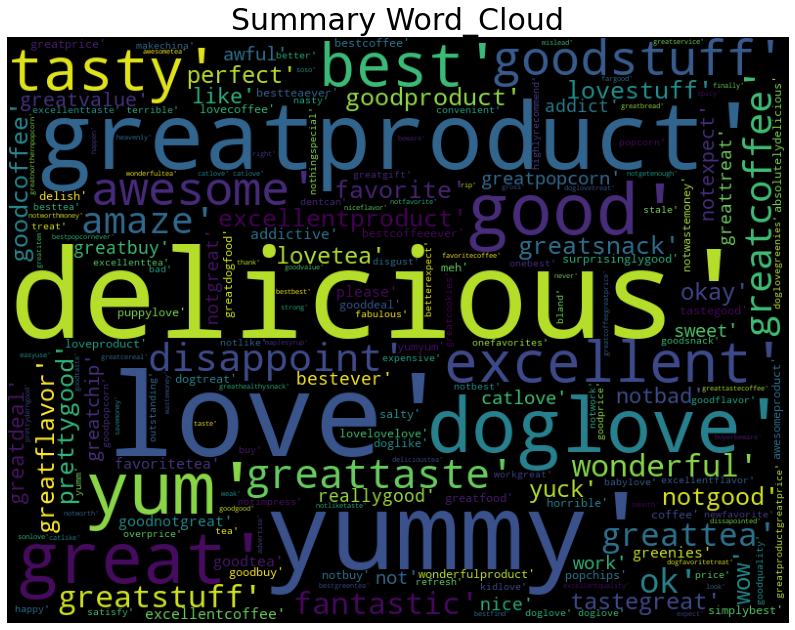

In [39]:
show_wordcloud(df,'Summary Word_Cloud')

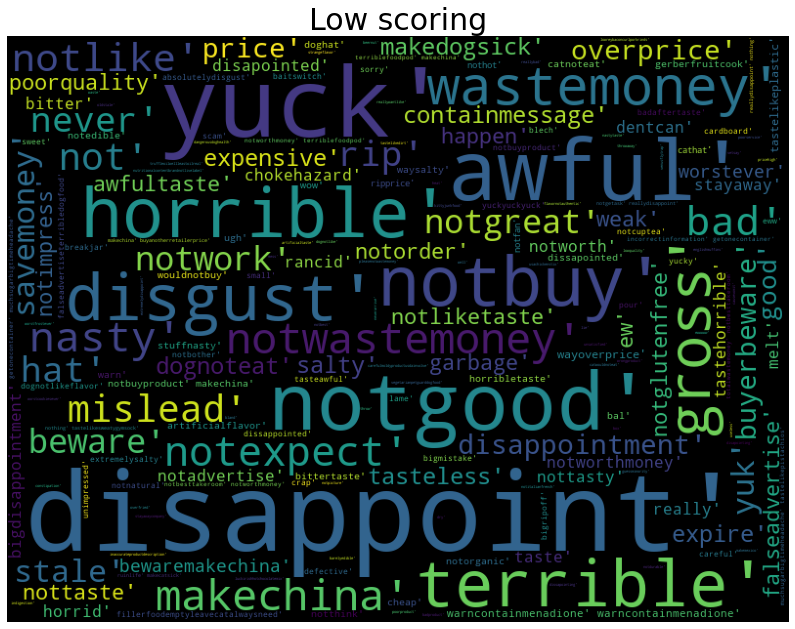

In [40]:
show_wordcloud(df[df.Score == 1], title = "Low scoring")

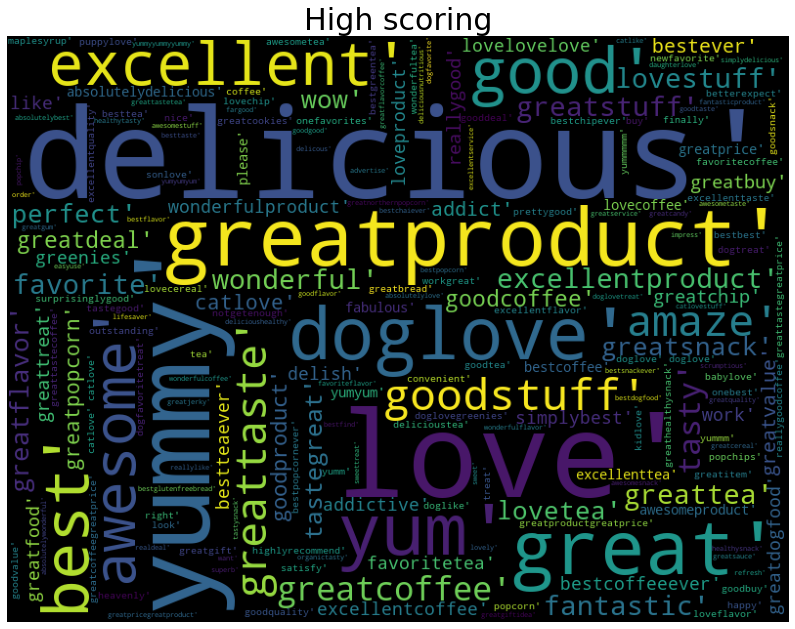

In [41]:
show_wordcloud(df[df.Score == 5], title = "High scoring")

In [42]:
#random forest

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)               
data_features = bow_vec.fit_transform(df['Text'])

data_features = data_features.toarray()

In [44]:
data_features.shape

(49998, 2000)

In [45]:
labels = df['Score']
labels = labels.astype('int')

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [47]:
import numpy as np 

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6744267613522704


In [49]:
#random forest n-estimator

In [50]:
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [51]:
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

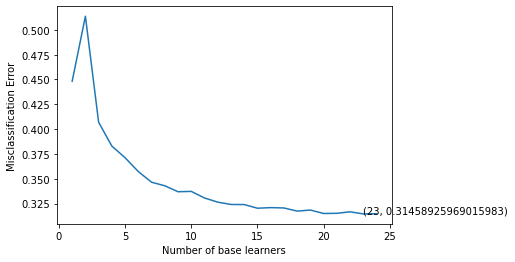

In [52]:
error = [1 - x for x in cv_scores]                                
optimal_learners = base_ln[error.index(min(error))]               
plt.plot(base_ln, error)                                          
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [53]:
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6928

In [54]:
result =  clf.predict(X_test)  

In [55]:
#import mlflow

#remote_server_uri = "http://127.0.0.1:5000"
#mlflow.set_tracking_uri(remote_server_uri)
#with mlflow.start_run():
#    mlflow.set_experiment('Majorproject-Mlflow')
#    mlflow.log_param("results", result)
#mlflow.end_run()

[[ 622   17   24   39  732]
 [ 118  101   33   71  536]
 [  78   34  200  102  817]
 [  39   12   37  449 1664]
 [  77   14   32  132 9020]]
0.6928


<AxesSubplot:>

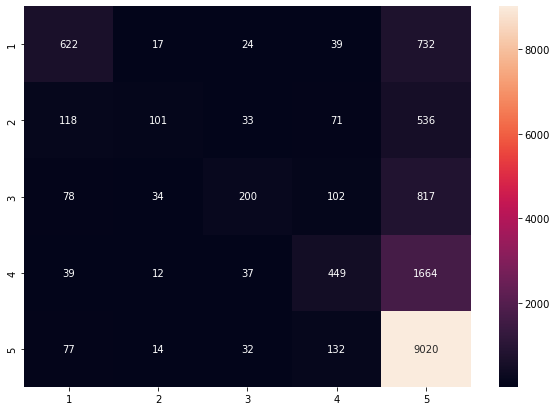

In [56]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [57]:
#top 40

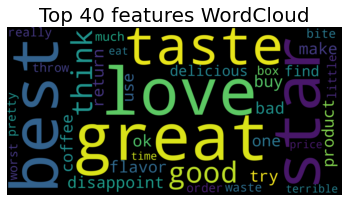

In [58]:
all_features = bow_vec.get_feature_names()          
top_features=''                                            
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

In [59]:
!pip install Flask-SQLAlchemy

In [60]:
!pip install flask-wtf

In [61]:
from flask import Flask, render_template, request, redirect, url_for,Response
from flask_wtf import FlaskForm
from flask_wtf.file import FileField, FileRequired
import boto3
import botocore
from io import BytesIO
from wordcloud import WordCloud
import os

# AWS configuration
S3_BUCKET = 'testflaskexample'
S3_KEY = os.environ.get('access key')
S3_SECRET = os.environ.get('secret key')
S3_LOCATION = 'http://{}.s3.amazonaws.com/'.format(S3_BUCKET)

# Create a Flask application
app = Flask(__name__)
app.config['SECRET_KEY'] = 'secret-key'

# Create a Flask-WTF form
class UploadForm(FlaskForm):
    file = FileField(validators=[FileRequired()])

# Create a Boto3 client for S3
s3 = boto3.client(
   "s3",
   aws_access_key_id=S3_KEY,
   aws_secret_access_key=S3_SECRET
)

# Create a route for the home page
@app.route('/', methods=['GET', 'POST'])
def home():
    form = UploadForm()
    if form.validate_on_submit():
        # Save the file to S3
        file = request.files['file']
        filename = file.filename
        s3.upload_fileobj(file, S3_BUCKET, filename)
        return redirect(url_for('uploaded_file', filename=filename))
    return render_template('home.html', form=form)

@app.route('/wordcloud')
def wordcloud():
    # Generate the wordcloud image
    text = "some text for the wordcloud"
    wc = WordCloud(width=800, height=400).generate(top_features)
    
    # Save the image to a BytesIO object
    img_io = BytesIO()
    wc.to_image().save(img_io, 'PNG')
    img_io.seek(0)

    # Return the image data with the appropriate content type
    return Response(img_io, mimetype='image/png')

# Create a route for the uploaded file
@app.route('/uploads/<filename>')
def uploaded_file(filename):
    return render_template('uploade.html', filename=S3_LOCATION + filename)

# Run the Flask application
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5002)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5002
 * Running on http://192.168.1.50:5002
Press CTRL+C to quit
